In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Training data shape
app_train = pd.read_csv('home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Testing data features
app_test = pd.read_csv('home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, bla bla bla .....

### Examine the distribution of the Target Variable
The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [4]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

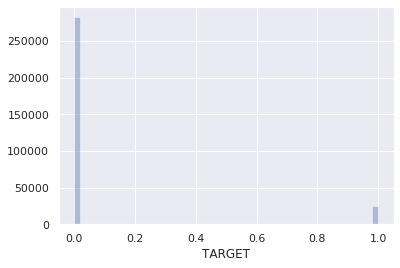

In [174]:
sns.set()
sns.distplot(app_train['TARGET'].astype('int'), kde=False)
plt.show()

#### **What is the Class Imbalance Problem?**

It is the problem in machine learning where the total number of a class of data (positive) is far less than the total number of another class of data (negative). This problem is extremely common in practice and can be observed in various disciplines including fraud detection, anomaly detection, medical diagnosis, oil spillage detection, facial recognition, etc.

#### **Why is it a problem?**
Most machine learning algorithms and works best when the number of instances of each classes are roughly equal. When the number of instances of one class far exceeds the other, problems arise.

### Examine Missing Values
Look at the number and percentage of missing values in each column.

In [6]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

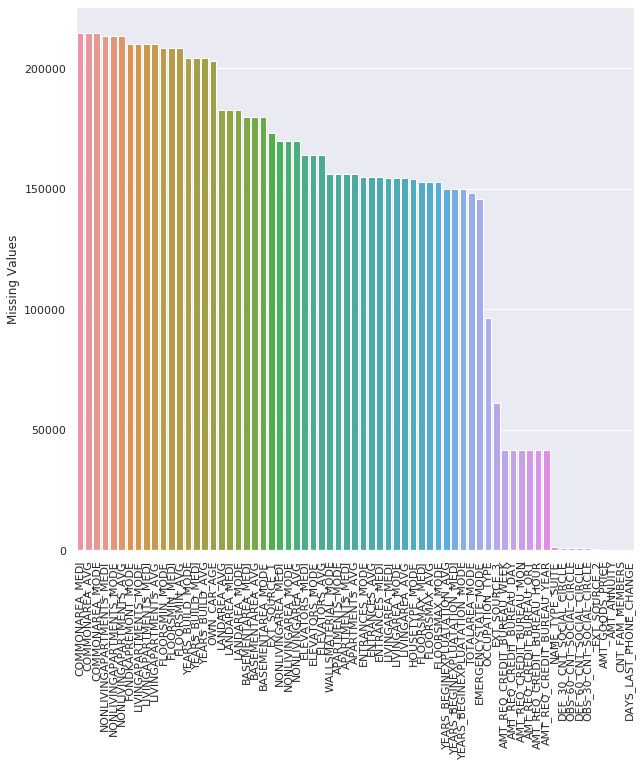

In [18]:
sns.set()
plt.figure(figsize=(10,10))
ax = sns.barplot(x=missing_values.index, y=missing_values['Missing Values'])
plt.xticks(rotation=90)
plt.show()

### Contract Type
Let's see the type of the loans taken and also, on a separate plot, the percent of the loans (by type of the loan) with TARGET value 1 (not returned loan).

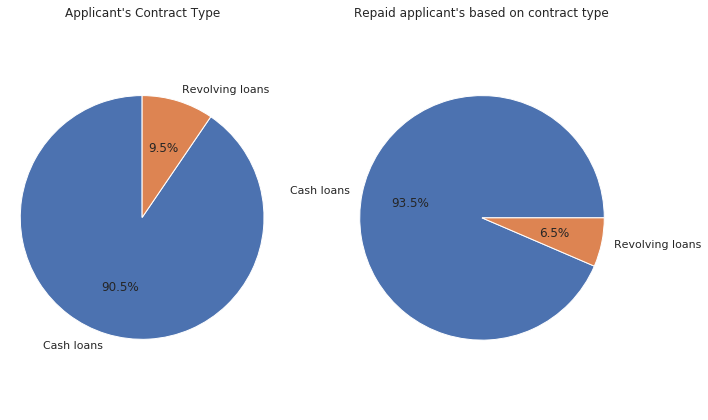

In [140]:
plt.subplots(figsize=(10,6))
contract_type = pd.DataFrame(app_train['NAME_CONTRACT_TYPE'].value_counts())
ax1 = plt.subplot(1,2,1)
ax1.pie(np.array(contract_type['NAME_CONTRACT_TYPE']), labels=contract_type.index, startangle=90,  autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Applicant's Contract Type")

contract_type_paid = pd.DataFrame(app_train[app_train['TARGET']==1]['NAME_CONTRACT_TYPE'].value_counts())
ax2 = plt.subplot(1,2,2)
ax2.pie(np.array(contract_type_paid.values), labels=contract_type_paid.index, autopct='%1.1f%%')
ax2.axis('equal')
plt.title("Repaid applicant's based on contract type")

plt.tight_layout()
plt.show()

### Applicant's Gender 
Let's see the gender of the clients and also, on a separate plot, the percent of the loans (by client gender) with TARGET value 1 (not returned loan).

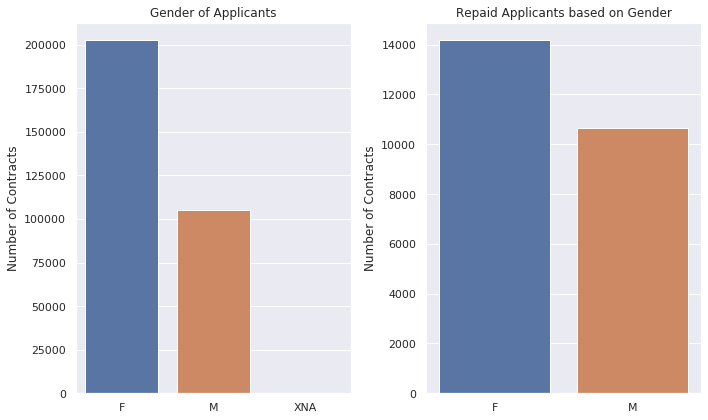

In [117]:
plt.subplots(figsize=(10,6))

plt.subplot(1,2,1)
gender_app = pd.DataFrame(app_train['CODE_GENDER'].value_counts())
sns.barplot(gender_app.index, gender_app.values.flatten())
plt.title('Gender of Applicants')
plt.ylabel('Number of Contracts')

plt.subplot(1,2,2)
gender_app_paid = app_train[app_train['TARGET']==1]['CODE_GENDER'].value_counts()
sns.barplot(gender_app_paid.index, gender_app_paid.values.flatten())
plt.title('Repaid Applicants based on Gender')
plt.ylabel('Number of Contracts')
plt.tight_layout()
plt.show()

The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (\~10%), comparing with women (\~7%).

### Flag Own A Car and Real Estate

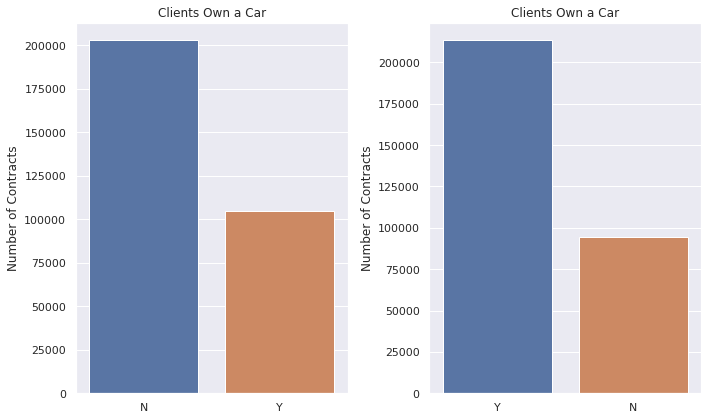

In [146]:
plt.subplots(figsize=(10,6))
plt.subplot(1,2,1)
own_car = pd.DataFrame(app_train['FLAG_OWN_CAR'].value_counts())
sns.barplot(own_car.index, own_car.values.flatten())
plt.title('Clients Own a Car')
plt.ylabel('Number of Contracts')

plt.subplot(1,2,2)
own_real = pd.DataFrame(app_train['FLAG_OWN_REALTY'].value_counts())
sns.barplot(own_real.index, own_real.values.flatten())
plt.title('Clients Own a Car')
plt.ylabel('Number of Contracts')

plt.tight_layout()
plt.show()

### Flag Own a Real Estate

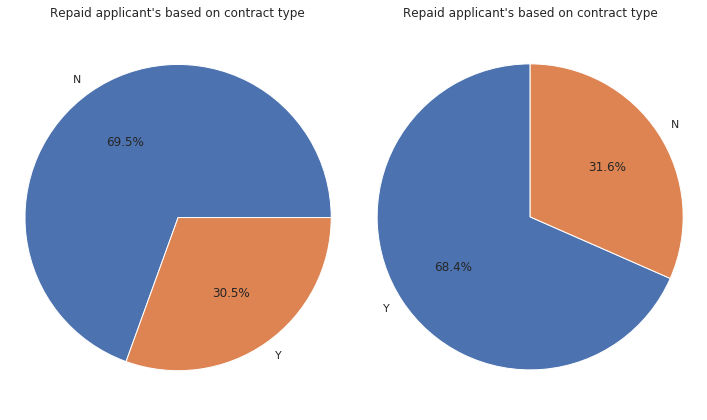

In [143]:
plt.subplots(figsize=(10,6))

own_car_paid = pd.DataFrame(app_train[app_train['TARGET']==1]['FLAG_OWN_CAR'].value_counts())
ax = plt.subplot(1,2,1)
ax.pie(np.array(own_car_paid.values), labels=own_car_paid.index, autopct='%1.1f%%')
ax.axis('equal')
plt.title("Repaid applicant's based on contract type")

own_real_paid = pd.DataFrame(app_train[app_train['TARGET']==1]['FLAG_OWN_REALTY'].value_counts())
ax = plt.subplot(1,2,2)
ax.pie(np.array(own_real_paid.values), labels=own_real_paid.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title("Repaid applicant's based on contract type")
plt.tight_layout()
plt.show()

### Applicant's Family Status


Married people have applied for a larger number of loan applications about 196K, However, people having Civil Marriage has the highest percentage (about 10%) of loan problems and challenges.

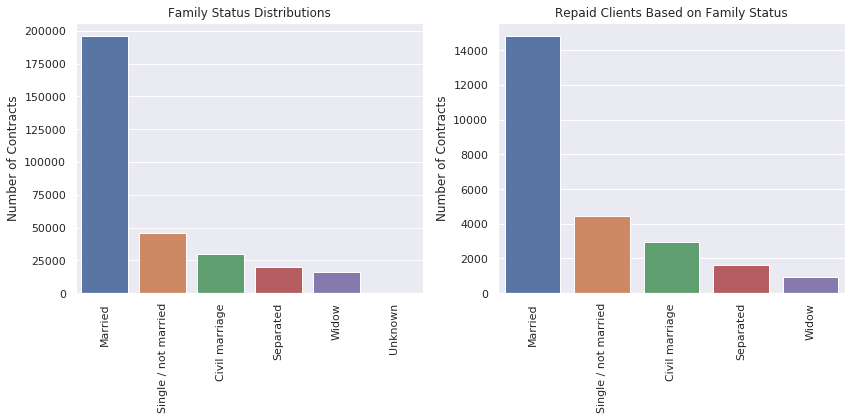

In [133]:
plt.subplots(ncols=2, figsize=(12,6))

plt.subplot(1,2,1)
family_stats = pd.DataFrame(app_train['NAME_FAMILY_STATUS'].value_counts())
sns.barplot(family_stats.index, family_stats.values.flatten())
plt.title('Family Status Distributions')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
family_stats_paid = app_train[app_train['TARGET']==1]['NAME_FAMILY_STATUS'].value_counts()
sns.barplot(family_stats_paid.index, family_stats_paid.values.flatten())
plt.title('Repaid Clients Based on Family Status')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Number Of Family Members

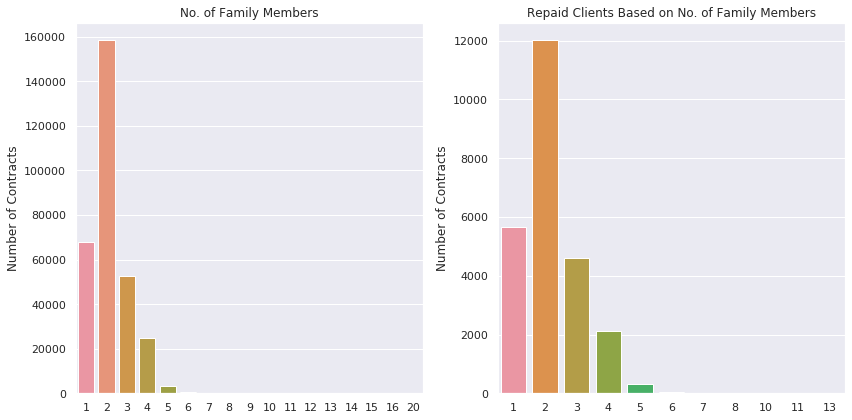

In [166]:
plt.subplots(figsize=(12,6))

plt.subplot(1,2,1)
fam_members = pd.DataFrame(app_train['CNT_FAM_MEMBERS'].value_counts())
sns.barplot(fam_members.index.astype('int'), fam_members.values.flatten())
plt.title('No. of Family Members')
plt.ylabel('Number of Contracts')

plt.subplot(1,2,2)
fam_members_paid = app_train[app_train['TARGET']==1]['CNT_FAM_MEMBERS'].value_counts()
sns.barplot(fam_members_paid.index.astype('int'), fam_members_paid.values.flatten())
plt.title('Repaid Clients Based on No. of Family Members')
plt.ylabel('Number of Contracts')

plt.tight_layout()
plt.show()

Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4.

Clients with family size of 11 and 13 have 100% not repayment rate. Other families with 10 or 8 members have percents of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10% average.